
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('sample_data/medical-charges.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для того, щоб прогнозувати значення колонки charges потрібно зробити аналіз відомих значень, прорахувати всеможливі кореляції та познаходити закономірності та залежності між значеннями. Також потрібно проаналізувати кожну колонку самостійно і можливо попрацювати з викдами і заповнити пропущені значення, або змінити тип з string => number якщо потрібно (або інші форматування по потребі). Також спробувати зменшити використовувану пам.ять, так як це може істотно пришвидшити нашу роботу у подальшому.

Далі, можемо почати з того чи впливає вік на charges. Тобто проаналізувати спочатку числові значення, знайти залежності і зафіксувати їх певним висновком. Далі можемо приступити до категоріальних змінних та нашої target колонки (тобто charges). Проаналізувати групу жінок та чоловіків, чи впливає стать, якщо бачимо цікаві випадки, то робимо додаткові дослідження, наприклад: ми розбили на 2 групи, жінки та чоловіки, і бачимо по графіках що чомусь жінкам завищують ціну, але незрозуміло чому, я б почала шукати причину яка впливає на це, і почала б експерементувати додаючи інші категоріальні колонки або ж числові колонки, щоб зрозуміти, що все-таки впливає на такий показник.

Також я б зробила додаткову колонку з значеннями 1 0, яка б позначала чи є діти у людини чи немає, поексперементувала б з цим.

Впродовж аналізу я б використовувала кореляцію пірсона а також для кращого розуміння даних я б побудувала матрицю кореляції.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
fig_sex = px.histogram(
 medical_df,
    x="charges",
    color="sex",
    marginal="box",
    nbins=50,
    title="Розподіл медичних зборів за статтю"
)
fig_sex.show()


fig_region = px.histogram(
    medical_df,
    x="charges",
    color="region",
    marginal="box",
    nbins=50,
    title="Розподіл медичних зборів за регіоном"
)
fig_region.show()

fig_smoker = px.histogram(
    medical_df,
    x="charges",
    color="smoker",
    marginal="box",
    nbins=50,
    title="Розподіл медичних зборів за курцями"
)
fig_smoker.show()


**Charges + Sex**:
По тому як розподіляється charges відносно статі людини, можна зробити висновок що більшість даних зосереджені ближче до осі Y (right-skewed розподіл), тобто більша частка людей які беруть страхівку все-таки платять менше. І чим більший прайс, тим менша кількість людей підпадає під цю групу (як жінки так і чоловіки).
бачимо по boxplot-female що дані більш щільно розташовані, в той час як у чоловіків вони більше розтягнуті. Тобто більше чоловіків, які платять за страховку більше аніж жінок.


**Charges + Region**: По тому як розподіляється charges відносно регіону проживання людини, можна зробити висновок аналогічний як у попередньому випадку з статтю, що більшість даних зосереджені ближче до осі Y (right-skewed розподіл). Найбільше людей у групі, які платять саме від 2000-4000 (те саме видно і на гістограмі вище charges+sex). Найбільш щільно розташовані дані з southwest регіону, та найбільш широко для southeast. В загальному дані довольно рівномірно розпроділяються по всіх регіонах. Можливо б тут досліджувала дві групи окремо, групу яка плотить від 0-14 і від 14+ тисяч.

**Charges + Smoker**: Також цікаво розглянути розподіл курців і ціни, яку вони сплачують. З гістограми можемо чітко побачити, що все-таки курці платять більше, немає жодного курця який би платив менше ніж 12к. Але все ж є не курці які платять більше ніж 12к і попадають в проміжок від 12к-38к при максимальній можливій ціні 64к.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
fig_smoker = px.histogram(
    medical_df,
    x="region",
    color="smoker",
    marginal="box",
    nbins=10,
    title="Розподіл регіону за курцями"
)
fig_smoker.show()

In [ ]:
fig_smoker = px.histogram(
    medical_df,
    x="children",
    color="smoker",
    marginal="box",
    nbins=50,
    title="Розподіл регіону за курцями"
)
fig_smoker.show()

**Region + Smoker**
Найбільше людей з регіону southeast, відповідно і більше курців і не курців у абсолютній величині. Не курці розподілені рівномірно по всьому розподілу регіонів. Але курці більш скупчені в southeast та northeast регіонах. Не курців  значно більше аніж курців, тобто можливо не курці частіше беруть страхівку, і дбають про своє здоров'я. (Також якщо взяти до уваги гістограму розподілу ціни відносно курців і не курців також стає зрозуміло, що можливо курці не беруть страхівку в такій великій кількості як не курці, саме через ціну, так як для курців вона стартує від 12к при мінімальному charges 0-2к).

**Childrens + Smoker**
Дані про наявніть дітей відносно курців і не курців розподілені рівномірно по всій довжині. Тобто не спостерігається якоїсь залежності між наявністю дітей і курінням.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(medical_df, x="children", y="charges", box=True)
fig.show()

Для людей у яких немає дітей, платять від 0-64к, але дані найбільше зосереджені саме від 2к-14к. Медіана зміщена вправо, тобто маємо left-skewed розподіл.

Для людей у яких одна дитина, маємо медіану зміщену вліво, тобто right-skewed розподіл. Більшість даних зосереджено 4к-15к. Медіана менша ніж в групі без дітей, але не набагто.

Для людей з 2ма дітьми дані розподілені більш широко від 6к-20к, якщо порівнювати з тими у кого одна дитина, хоча медіана також зміщена вліво і маєсо right-skewed розподіл. Також бачимо що максимум менший ніж в тих у кого одна дитина або взагалі немає дітей. Медіана більша ніж в групі де є лише одна дитина.

Для людей з 3ма дітьми, медіана більша ніж у тих у кого 2 дитини, і бачимо шо графік піднятий відносно осі у вверх якщо порівнювати з групою де 2 дитини. Також маємо медіану яка зміщена вліво, але також можемо спостерігати більш витягнутий графік по осі у ніж в тих у кого 1 чи 2 дитини, тобто максимум більший ніж у тих у кого 1 чи 2 дитини.

Для людей у кого 4 дитини, медіана більша ніж у тих у кого 3 дитини та зміщена вліво трішки, бачимо значно менше викидів ніж у попередньому випадку. Також бачимо що графік пдянти вверх відносно попереднього випадку по осі У і густо начисений в районі медіани. Дані дополі рівномірно розподіляються(наближені до гаусівського). Ті у кого 4 дитини в середньому платять більше ніж попередні (без дітей, з 1 чи 2 чи 3 дітьми).

Для людей у кого 5 дітей медіана складає 8500 це трошки більше ніж ті у кого 2 дитини, і приблизно платять починаючи від 4к-19к, немає тих хто платить менше 4 чи більше.

**Висновок**: Ті у кого немає дітей мають можливість платити від 1100 і до 67к за страхівку, але групи у яких є від 1-4 дітей ціна за послугу збільшується зі збільшенням кількості дітей і дані стають щільніші і стає все менше викидів і тих хто платить значно більше, тобто врізається можливість купувати як дешевшу так і дорогу страхівку. Але є група у яких 5 дітей, то вони платять від 4к і до 9к при тому що в середньому платять десь як ті у кого 2 або 3 дитини, але при цьому у них дуже щільно розташовані дані і це свідчить про маленький вибір страхівок і цін на них.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

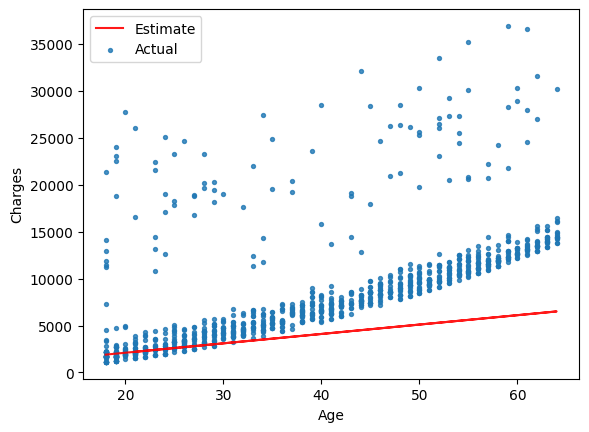

In [ ]:
try_parameters(non_smoker_df, 100, 100)

Кут нахилу занадто малий і лінія не зовсім попадає в розподіл даних, спробуємо збільшити кут нахилу, збільшивши b показник.

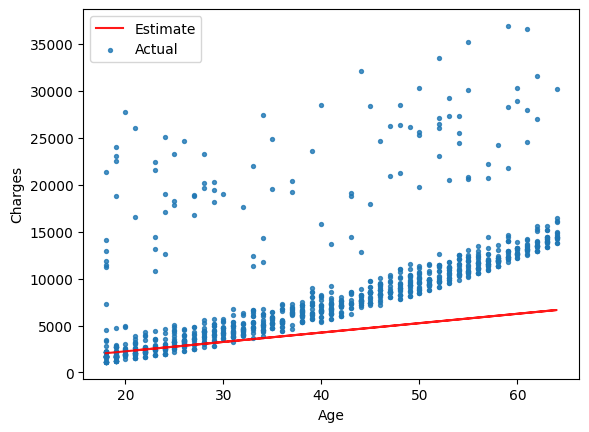

In [ ]:
try_parameters(non_smoker_df, 100, 250)

Бачимо, що лінія наче зовсім не змінилась, тож збільшимо w і підправимо b.

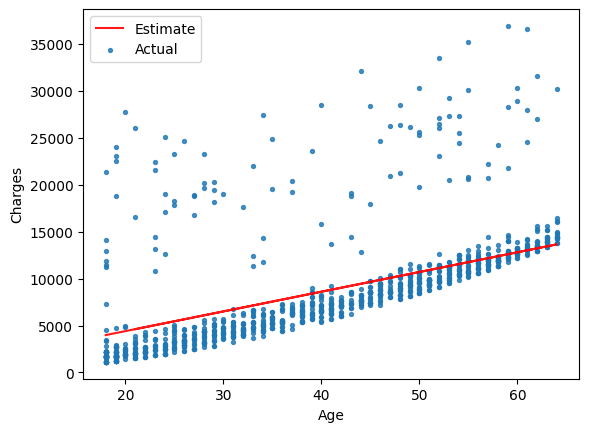

In [ ]:
try_parameters(non_smoker_df, 210, 200)

Це вже краще, наша лінія в більшій мірі дотикається і проходить через найбільше скупчення в розподілі даних.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
import numpy as np

def rmse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def try_parameters_with_rmse(df, w, b):
    ages = df.age
    target = df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  6826.734303208685


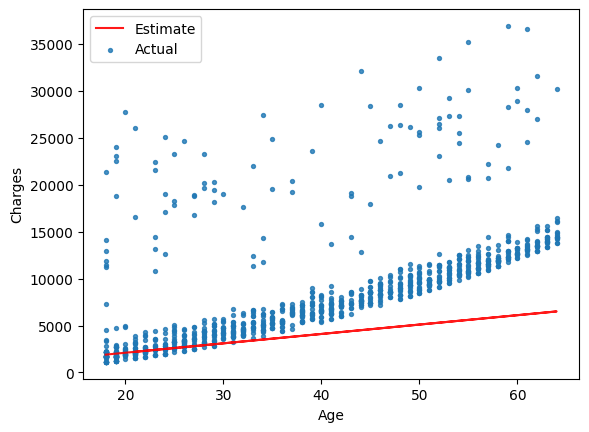

In [28]:
try_parameters_with_rmse(non_smoker_df, 100, 100)

RMSE Loss:  6056.310935782766


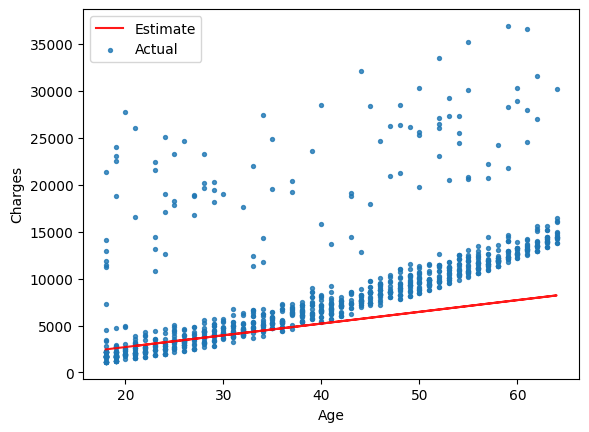

In [29]:
try_parameters_with_rmse(non_smoker_df, 125, 205)

RMSE Loss:  4765.821760273739


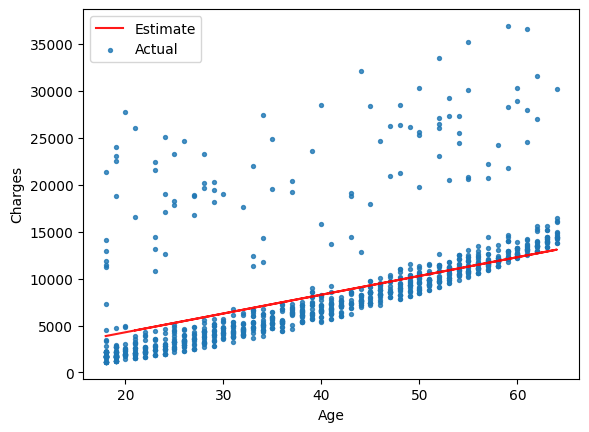

In [74]:
try_parameters_with_rmse(non_smoker_df, 200, 278)

Найнижче значення втрат, яке вдалось досягти це 4765.821. Загальна стратегія є такою, що w < b. Чим більше значення b, тим вище по y буде проходити лінія, але нам це не підходить, бо найбільше скупчення даних знаходиться між 0-5000. Також сдід зазначити що w регулює кут нахилу. Відповідно w і b +- поруч. Шляхоч спроб і помилок визначено, що при w=200, b=278, наша лінія проходить через цей діапазон з найбільшим скупченням даних.